# Лабораторная работа № 3

# Супонина Анастасия Павловна

## Цель работы.

Научиться применять распределения для преобразования случайных величин. 

## Задание.

Сгенерировать выборку точек, равномерно распределенных внутри круга
двумя способами: 

1. Равномерно распределить точки внутри квадрата, внутрь которого вписана окружность, и отфильтровать точки, лежащие за пределами окружности.

2. Генерировать точки путем задания случайного угла и расстояния от центра окружности.

Радиус окружности R=10, размер выборки 1000 точек.
Для созданных выборок сделать следующее:

    a. Создать рисунок, иллюстрирующий расположение точек сгенерированной выборки внутри окружности;
    b. Найти выборочные средние координат точек и их дисперсию;
    c. Построить график плотности распределения расстояния от случайной равномернораспределенной точки в круге до фиксированной точки лежащей вне окружности(к примеру, с координатами X=20, Y=0).
    d. Построить график плотности распределения расстояния между двумя cлучайными точками, равномерно расположенными внутри круга

1. Равномерно распределить точки внутри квадрата, внутрь которого вписана окружность, и отфильтровать точки, лежащие за пределами окружности.

In [37]:
# Ввожу все необходимые для работы библиотеки
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

Для начала работы задаю окружность с радиусом R=10 и размер выборки.

In [38]:
circle_radius = 10
set_size = 1000

Для того, чтобы нарисовать точки нам необходимо знать их значения по координатам x, y.
Создаю два массива для записи x, y, а также счетчик для сгенерированных в цикле точек.

In [39]:
set_x = []
set_y = []
dots_counter = 0

Пишу цикл для создания точек и записи их значений

In [40]:
while dots_counter < set_size:
    x = np.random.uniform(-10,10)
    y = np.random.uniform(-10,10)
    # сейчас точки генерируются по квадрату, зададим дополнительное условие, чтобы они генерировались в окружности.
    if x**2 + y**2 <= circle_radius**2:
        set_x.append(x)
        set_y.append(y)
        dots_counter += 1
    # таким образом из случайно сгенерированных точек буду записывать только те, которые входят в окружность

a. Создать рисунок, иллюстрирующий расположение точек сгенерированной выборки внутри окружности;

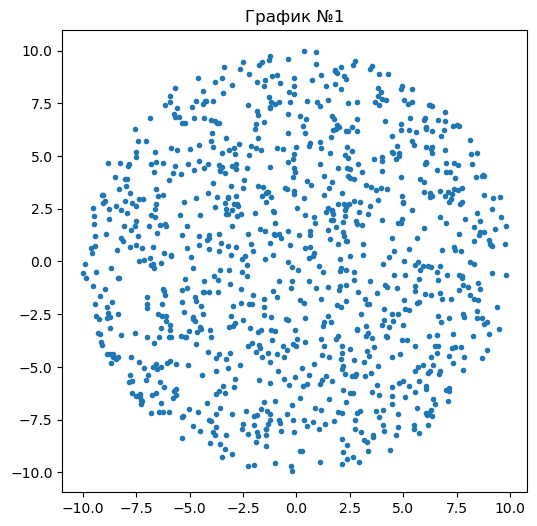

In [42]:
plt.figure(dpi=100,figsize=(6,6))
plt.title('График №1')
plt.plot(set_x, set_y, '.')
plt.show()

Теперь напишу отдельную функцию, которая будет рисовать на графике линию окружности, используя формулу для построения окружности через угол.

In [43]:
circle_angels = np.linspace(0, 2*np.pi, 100)
circle_x = circle_radius*np.cos(circle_angels)
circle_y = circle_radius*np.sin(circle_angels)

Добавляю отображение окружности к первому графику.

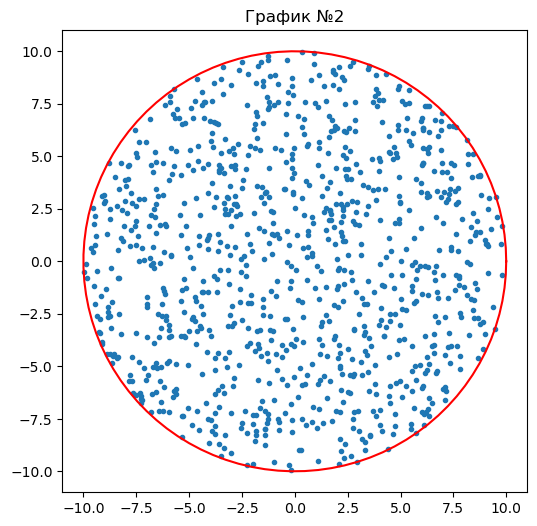

In [44]:
plt.figure(dpi=100,figsize=(6,6))
plt.title('График №2')
plt.plot(set_x, set_y, '.')
plt.plot(circle_x, circle_y, color = 'red')
plt.show()

На графике видно, что при таком решении часть точек попадает на линию окружности, для того, чтобы избежать этого изменяю условия для окружности в цикле на < вместо <=.

In [8]:
while dots_counter < set_size:
    x = np.random.uniform(-10,10)
    y = np.random.uniform(-10,10)
    # сейчас точки генерируются по квадрату, зададим дополнительное условие, чтобы они генерировались в окружности.
    if x**2 + y**2 < circle_radius**2:
        set_x.append(x)
        set_y.append(y)
        dots_counter += 1
    # таким образом из случайно сгенерированных точек буду записывать только те, которые входят в окружность

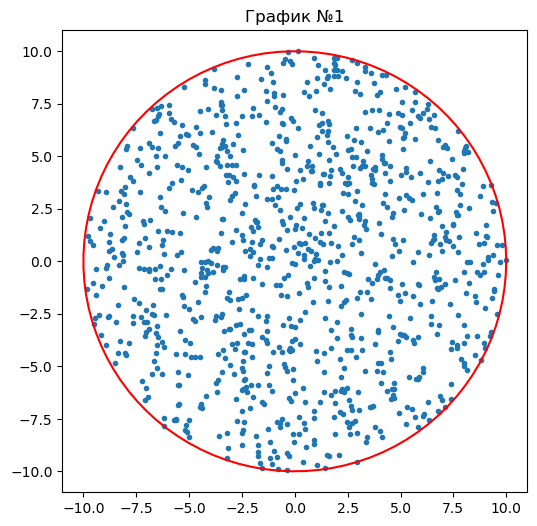

In [9]:
plt.figure(dpi=100,figsize=(6,6))
plt.title('График №1')
plt.plot(set_x, set_y, '.')
plt.plot(circle_x, circle_y, color = 'red')
plt.show()

Вычисляю окружность при помощи полярных координат.

b. Найти выборочные средние координат точек и их дисперсию;

In [10]:
print('Mean for x:', np.mean(set_x))
print('Var for x:', np.var(set_x))
print('Mean for y:', np.mean(set_y))
print('Var for y:', np.var(set_y))

Mean for x: 0.1592505379020999
Var for x: 23.896467269836094
Mean for y: 0.2281278788170736
Var for y: 24.40504820095258


c. Построить график плотности распределения расстояния от случайной равномернораспределенной точки в круге до фиксированной точки лежащей вне окружности(к примеру, с координатами X=20, Y=0).
Задаю главную точку:

In [11]:
main_x = 20
main_y = 0

Пишу функцию для расчета расстояния между двумя точками

In [12]:
def distance (x1, y1, x2, y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

Создаю пустой массив для помещения в него вычисленных расстояний и добавляем в массив все полученные расстояния

In [13]:
distances = []
for i in range(set_size):
    distances.append(distance(set_x[i], set_y[i], main_x, main_y))
distances.sort() # сортирую значения по возрастанию

Чтобы получить плотность использую gaussian_kde

In [14]:
kde_distances_y = gaussian_kde(distances).evaluate(distances) # получаем значения y, которые позволяют сгладить нашу плотность

Рисую гистограмму, по этой гистограмме сглаживаю линию плотности.

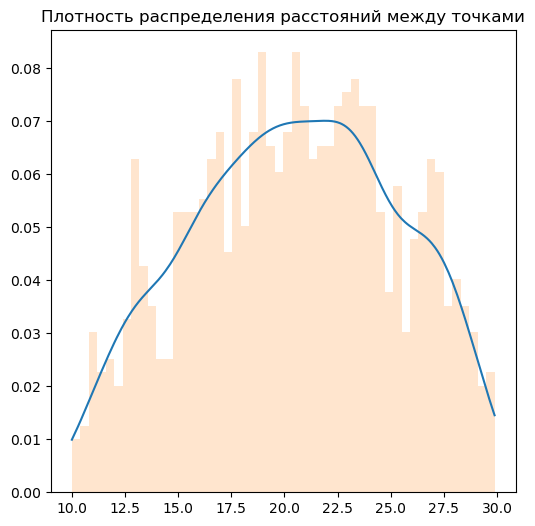

In [15]:
plt.figure(dpi=100,figsize=(6,6))
plt.title('Плотность распределения расстояний между точками')
plt.plot(distances, kde_distances_y)
plt.hist(distances, bins = 50, alpha = 0.2, density = True)
plt.show()

d. Построить график плотности распределения расстояния между двумя cлучайными точками, равномерно расположенными внутри круга

Для того чтобы построить расстояние между двумя точками в круге, беру случайным образом из set_x, set_y две случайные точки и для этой иттерации остальные значения из массива удаляю, провожу это то колво раз, которое запрашивается в задании, получаю эти значения и строю график плотности.

In [18]:
point_distance = []
for i in range(500):
    point1, point2 = np.random.choice(set_size, 2, replace = False)
    point_distance.append(distance(set_x[point1], set_y[point1], set_x[point2], set_y[point2]))

In [24]:
kde_between_points = gaussian_kde(point_distance)
point_distance.sort()

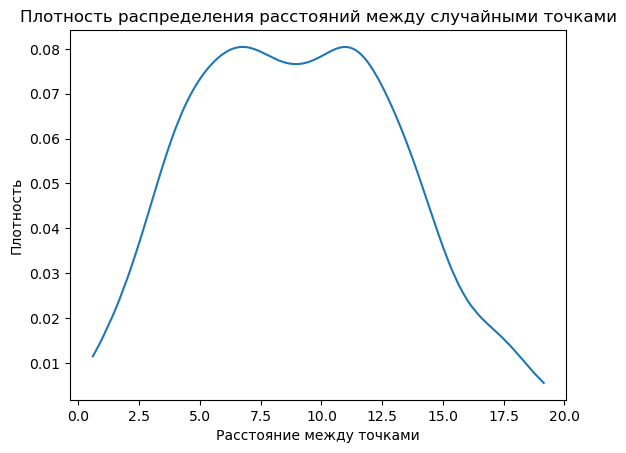

In [25]:
plt.figure(dpi=100)
plt.title('Плотность распределения расстояний между случайными точками')
plt.plot(point_distance, kde_between_points(point_distance))
plt.xlabel("Расстояние между точками")
plt.ylabel("Плотность")
plt.show()

2. Генерировать точки путем задания случайного угла и расстояния от центра окружности.

a. Создать рисунок, иллюстрирующий расположение точек сгенерированной выборки внутри окружности;

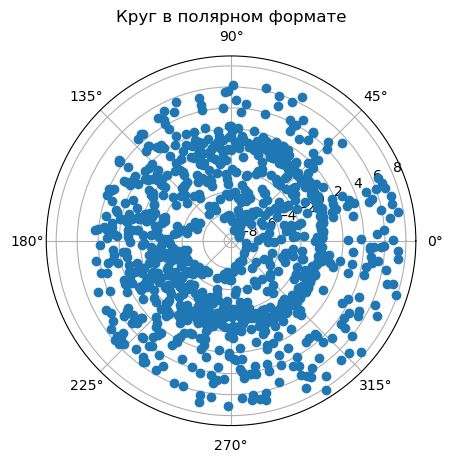

In [26]:
radian = []
count = 0 
while count < set_size:
    rad = np.random.uniform()
    radian.append(rad)
    count += 1


set_circle_x = []
set_circle_y = []
for i in radian:
    r = np.random.uniform(-10,10)
    circle_x = r*np.cos(i)
    circle_y = r*np.sin(i)
    set_circle_x.append(circle_x)
    set_circle_y.append(circle_y)
    dots_counter += 1

plt.axes(projection ='polar')

# Задайте заголовок для полярного графика
plt.title('Круг в полярном формате')

# Постройте окружность с радиусом 2 в полярной системе координат
rads = np.arange(0, (2*np.pi), 0.01)

plt.polar(set_circle_x, set_circle_y, 'o')

# Отобразить полярный график
plt.show()
 

b. Найти выборочные средние координат точек и их дисперсию;



In [27]:
print('Mean for x:', np.mean(set_circle_x))
print('Var for x:', np.var(set_circle_x))
print('Mean for y:', np.mean(set_circle_y))
print('Var for y:', np.var(set_circle_y))

Mean for x: 0.014004656878831014
Var for x: 25.15625981510718
Mean for y: 0.13435230442640883
Var for y: 9.736578501877752


c. Построить график плотности распределения расстояния от случайной равномернораспределенной точки в круге до фиксированной точки лежащей вне окружности(к примеру, с координатами X=20, Y=0).



In [28]:
main_x = 20
main_y = 0

In [29]:
distances = []
for i in range(set_size):
    distances.append(distance(set_circle_x[i], set_circle_y[i], main_x, main_y))
distances.sort() # сортирую значения по возрастанию

In [30]:
kde_distances_y = gaussian_kde(distances).evaluate(distances) # получаем значения y, которые позволяют сгладить нашу плотность

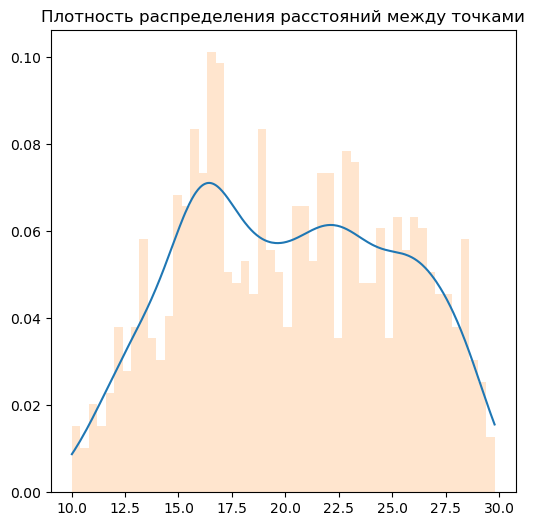

In [31]:
plt.figure(dpi=100,figsize=(6,6))
plt.title('Плотность распределения расстояний между точками')
plt.plot(distances, kde_distances_y)
plt.hist(distances, bins = 50, alpha = 0.2, density = True)
plt.show()

d. Построить график плотности распределения расстояния между двумя cлучайными точками, равномерно расположенными внутри круга

In [33]:
point_distance = []
for i in range(500):
    point1, point2 = np.random.choice(set_size, 2, replace = False)
    point_distance.append(distance(set_circle_x[point1], set_circle_y[point1], set_circle_x[point2], set_circle_y[point2]))

In [34]:
kde_between_points = gaussian_kde(point_distance)
point_distance.sort()

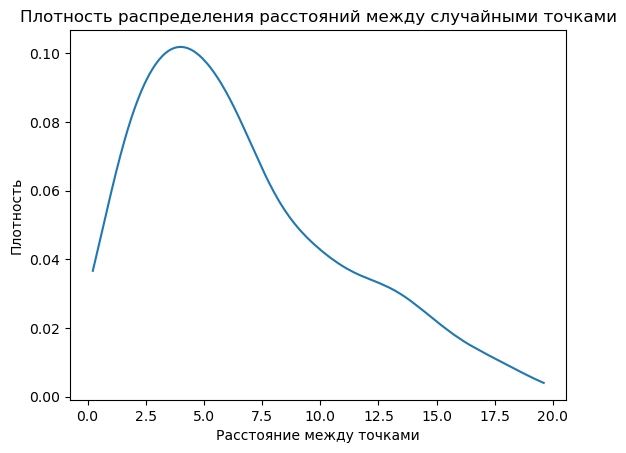

In [35]:
plt.figure(dpi=100)
plt.title('Плотность распределения расстояний между случайными точками')
plt.plot(point_distance, kde_between_points(point_distance))
plt.xlabel("Расстояние между точками")
plt.ylabel("Плотность")
plt.show()